In [362]:
import mlrose_hiive as mlrose
import numpy as np

In [477]:
fitness = mlrose.OneMax()


I chose to select for each algorithm a number of iterations equal to 5 times the problem size and a number of attemps equal to 20% of the problem size

## RHC

In [468]:
random_seeds = [75 * i for i in range(1, 6)]
import time
size = [50,100,150]
fitness_dic_rhc = {}
fitness_curve_dic_rhc = {}
time_list_rhc = {}
for s in size:
    
    time_list_rhc[s] = []
    fitness_list = []
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
    
        
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts= 2 * s, max_iters= 5 * s, curve=True, random_state=random_state)
        time_list_rhc[s].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        fitness_dic_rhc[s] = fitness_list
        fitness_curve_dic_rhc[(s,random_state)] = fitness_curve

In [472]:
fitness_dic_rhc

{50: [50.0, 50.0, 50.0, 50.0, 50.0],
 100: [100.0, 100.0, 100.0, 100.0, 100.0],
 150: [148.0, 150.0, 150.0, 150.0, 150.0]}

In [481]:
size = 150
max_attempts = np.linspace(0,200,51)
fitness_ = {}
fitness_[50] = []
fitness_[100] = []
fitness_[150] = []
for a in max_attempts:
    for size in [50,100,150]:
        fitness_list = []
        for seed in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, max_attempts= a, max_iters= 5 * size, curve=True, random_state=seed)
            fitness_list.append(best_fitness)
        fitness_[size].append(np.mean(fitness_list))
        



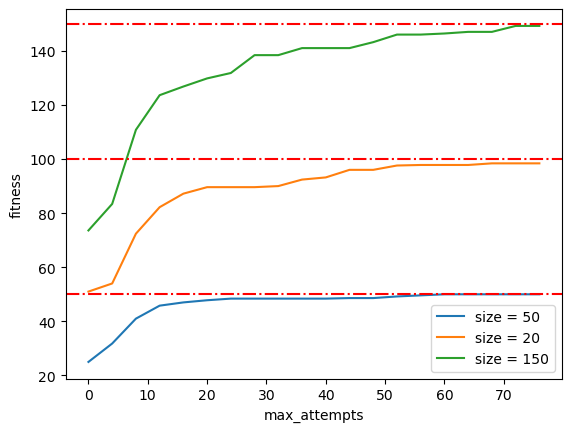

In [489]:
import matplotlib.pyplot as plt
plt.plot(max_attempts[:20], fitness_[50][:20], label = 'size = 50')
plt.plot(max_attempts[:20], fitness_[100][:20], label = 'size = 20')
plt.plot(max_attempts[:20], fitness_[150][:20], label = 'size = 150')
plt.xlabel('max_attempts')
plt.ylabel('fitness')
#horizontal line at 50, 100 and 150
plt.axhline(y=50, color='r', linestyle='dashdot')
plt.axhline(y=100, color='r', linestyle='dashdot')
plt.axhline(y=150, color='r', linestyle='dashdot')

plt.legend()

# Simulated annealing:

In [ ]:
# do a grid search for SA for the three type of decay; geometric, arithmatic, exponential, and for each of the three problems sizes

In [453]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50, 100, 150]

exp_decay = [5e-1,5e-2,5e-3,5e-4,5e-5,5e-6,5e-7]
geom_decay = [0.9,0.99,0.999,0.9999,0.99999,0.5]
arith_decay = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

decay = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
match_decay = ['ExpDecay','GeomDecay','ArithDecay']
grid_search_sa = {}


for size in problem_size:
    
        for decay in match_decay:
            if decay == 'ExpDecay':
                decay_list = exp_decay
            elif decay == 'GeomDecay':
                decay_list = geom_decay
            elif decay == 'ArithDecay':
                decay_list = arith_decay
            
            for d in decay_list:
                fitness_list = []
                
                if decay == 'ExpDecay':
                    schedule = mlrose.ExpDecay(init_temp=1, exp_const=d)
                    
                elif decay == 'GeomDecay':
                    schedule = mlrose.GeomDecay(init_temp=1, decay=d)
                    
                elif decay == 'ArithDecay':
                    schedule = mlrose.ArithDecay(init_temp=1, decay=d)
                    
                
                
                for random_state in random_seeds:
                    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=size, max_iters=size*5, curve=True, random_state=random_state)
                    fitness_list.append(best_fitness)
                grid_search_sa[(size,decay,d)] = np.mean(fitness_list)/size
            
            

In [460]:
grid_search_sa

{(50, 'ExpDecay', 0.5): 0.988,
 (50, 'ExpDecay', 0.05): 1.0,
 (50, 'ExpDecay', 0.005): 0.9359999999999999,
 (50, 'ExpDecay', 0.0005): 0.784,
 (50, 'ExpDecay', 5e-05): 0.768,
 (50, 'ExpDecay', 5e-06): 0.76,
 (50, 'ExpDecay', 5e-07): 0.752,
 (50, 'GeomDecay', 0.9): 0.996,
 (50, 'GeomDecay', 0.99): 0.992,
 (50, 'GeomDecay', 0.999): 0.768,
 (50, 'GeomDecay', 0.9999): 0.772,
 (50, 'GeomDecay', 0.99999): 0.76,
 (50, 'GeomDecay', 0.5): 0.988,
 (50, 'ArithDecay', 1e-07): 0.752,
 (50, 'ArithDecay', 1e-06): 0.752,
 (50, 'ArithDecay', 1e-05): 0.76,
 (50, 'ArithDecay', 0.0001): 0.772,
 (50, 'ArithDecay', 0.001): 0.7879999999999999,
 (50, 'ArithDecay', 0.01): 0.9840000000000001,
 (100, 'ExpDecay', 0.5): 0.996,
 (100, 'ExpDecay', 0.05): 0.996,
 (100, 'ExpDecay', 0.005): 0.9840000000000001,
 (100, 'ExpDecay', 0.0005): 0.75,
 (100, 'ExpDecay', 5e-05): 0.722,
 (100, 'ExpDecay', 5e-06): 0.7340000000000001,
 (100, 'ExpDecay', 5e-07): 0.73,
 (100, 'GeomDecay', 0.9): 0.996,
 (100, 'GeomDecay', 0.99): 0.994

In [454]:
#for each size, print the argmax of grid search
for size in problem_size:
    val = -np.inf
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
            
        for d in decay_list:
            if grid_search_sa[(size,decay,d)] > val:
                val = grid_search_sa[(size,decay,d)]
                best = (decay,d)
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val))

For size 50, the best parameters are ('ExpDecay', 0.05) with a fitness of 1.0
For size 100, the best parameters are ('ExpDecay', 0.5) with a fitness of 0.996
For size 150, the best parameters are ('GeomDecay', 0.99) with a fitness of 0.9933333333333333


Why are the decay different ????

[]

### We run the algorithm with the best hyperparameters:

In [458]:
random_seeds = [75 * i for i in range(1, 6)]

size = [50,100,150]

fitness_dic_sa = {}
fitness_curve_dic_sa = {}
time_list_sa = {}
for s in size:
    time_list_sa[s] = []
    fitness_list = []
    problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
    
    if s == 50:
        schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.05)
    elif s == 100:
        schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.5)
    else:
        schedule = mlrose.GeomDecay(init_temp=1, decay=0.99)
    
    for random_state in random_seeds:
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts= s * 1, max_iters= 5 * s, curve=True, random_state=random_state)
        
        time_list_sa[s].append(time.time() - start_time)
        
        fitness_list.append(best_fitness)
        fitness_dic_sa[s] = fitness_list
        fitness_curve_dic_sa[(s,random_state)] = fitness_curve
        
        

In [459]:
fitness_dic_sa

{50: [50.0, 50.0, 50.0, 50.0, 50.0],
 100: [100.0, 100.0, 100.0, 98.0, 100.0],
 150: [149.0, 148.0, 150.0, 148.0, 150.0]}

## Genetic algorithm

Grid search

In [382]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50, 100, 150]

mutation_prob = [0.1,0.2,0.3,0.4,0.5]
pop_breed_percent = [0.25,0.5,0.75]

grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    for mp in mutation_prob:
        for pbp in pop_breed_percent:
            fitness_list = []
            iter = []
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            for random_state in random_seeds:
                print(size,pbp,mp,random_state)
                best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, mutation_prob=mp,pop_breed_percent= pbp, max_attempts=size*0.2, max_iters=size*5, curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                iter.append(len(fitness_curve))
            grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
            grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)
 
                

50 0.25 0.1 75
50 0.25 0.1 150
50 0.25 0.1 225
50 0.25 0.1 300
50 0.25 0.1 375
50 0.5 0.1 75
50 0.5 0.1 150
50 0.5 0.1 225
50 0.5 0.1 300
50 0.5 0.1 375
50 0.75 0.1 75
50 0.75 0.1 150
50 0.75 0.1 225
50 0.75 0.1 300
50 0.75 0.1 375
50 0.25 0.2 75
50 0.25 0.2 150
50 0.25 0.2 225
50 0.25 0.2 300
50 0.25 0.2 375
50 0.5 0.2 75
50 0.5 0.2 150
50 0.5 0.2 225
50 0.5 0.2 300
50 0.5 0.2 375
50 0.75 0.2 75
50 0.75 0.2 150
50 0.75 0.2 225
50 0.75 0.2 300
50 0.75 0.2 375
50 0.25 0.3 75
50 0.25 0.3 150
50 0.25 0.3 225
50 0.25 0.3 300
50 0.25 0.3 375
50 0.5 0.3 75
50 0.5 0.3 150
50 0.5 0.3 225
50 0.5 0.3 300
50 0.5 0.3 375
50 0.75 0.3 75
50 0.75 0.3 150
50 0.75 0.3 225
50 0.75 0.3 300
50 0.75 0.3 375
50 0.25 0.4 75
50 0.25 0.4 150
50 0.25 0.4 225
50 0.25 0.4 300
50 0.25 0.4 375
50 0.5 0.4 75
50 0.5 0.4 150
50 0.5 0.4 225
50 0.5 0.4 300
50 0.5 0.4 375
50 0.75 0.4 75
50 0.75 0.4 150
50 0.75 0.4 225
50 0.75 0.4 300
50 0.75 0.4 375
50 0.25 0.5 75
50 0.25 0.5 150
50 0.25 0.5 225
50 0.25 0.5 300
50 0.25 0

In [265]:
grid_search_ga

{(100, 0.1, 0.25): 1.0,
 (100, 0.1, 0.5): 1.0,
 (100, 0.1, 0.75): 1.0,
 (100, 0.2, 0.25): 1.0,
 (100, 0.2, 0.5): 1.0,
 (100, 0.2, 0.75): 1.0,
 (100, 0.3, 0.25): 1.0,
 (100, 0.3, 0.5): 1.0,
 (100, 0.3, 0.75): 1.0,
 (100, 0.4, 0.25): 1.0,
 (100, 0.4, 0.5): 1.0,
 (100, 0.4, 0.75): 1.0,
 (100, 0.5, 0.25): 1.0,
 (100, 0.5, 0.5): 1.0,
 (100, 0.5, 0.75): 1.0,
 (500, 0.1, 0.25): 0.9992000000000001,
 (500, 0.1, 0.5): 1.0,
 (500, 0.1, 0.75): 0.9996,
 (500, 0.2, 0.25): 1.0,
 (500, 0.2, 0.5): 1.0,
 (500, 0.2, 0.75): 1.0,
 (500, 0.3, 0.25): 1.0,
 (500, 0.3, 0.5): 1.0,
 (500, 0.3, 0.75): 1.0,
 (500, 0.4, 0.25): 1.0,
 (500, 0.4, 0.5): 1.0,
 (500, 0.4, 0.75): 1.0,
 (500, 0.5, 0.25): 1.0,
 (500, 0.5, 0.5): 1.0,
 (500, 0.5, 0.75): 1.0,
 (1000, 0.1, 0.25): 1.0,
 (1000, 0.1, 0.5): 0.9996,
 (1000, 0.1, 0.75): 1.0,
 (1000, 0.2, 0.25): 0.9996,
 (1000, 0.2, 0.5): 1.0,
 (1000, 0.2, 0.75): 1.0,
 (1000, 0.3, 0.25): 1.0,
 (1000, 0.3, 0.5): 1.0,
 (1000, 0.3, 0.75): 1.0,
 (1000, 0.4, 0.25): 1.0,
 (1000, 0.4, 0.5): 

In [381]:
for size in problem_size:
    val = -np.inf
    for mp in mutation_prob:
        for pbp in pop_breed_percent:
            if grid_search_ga[(size,mp,pbp)] > val:
                val = grid_search_ga[(size,mp,pbp)]
                best = (mp,pbp)
            
        
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val))

For size 50, the best parameters are (0.1, 0.25) with a fitness of 1.0
For size 100, the best parameters are (0.1, 0.25) with a fitness of 1.0
For size 150, the best parameters are (0.1, 0.25) with a fitness of 1.0


Overall the paramters have no influence on the convergence time. To do later : look if one paramters make it converge in less iterations

In [490]:
grid_search_ga_iter

{(50, 0.1, 0.25): 50.6,
 (50, 0.1, 0.5): 31.2,
 (50, 0.1, 0.75): 31.2,
 (50, 0.2, 0.25): 48.8,
 (50, 0.2, 0.5): 33.4,
 (50, 0.2, 0.75): 29.8,
 (50, 0.3, 0.25): 51.8,
 (50, 0.3, 0.5): 33.6,
 (50, 0.3, 0.75): 29.2,
 (50, 0.4, 0.25): 42.2,
 (50, 0.4, 0.5): 31.8,
 (50, 0.4, 0.75): 29.4,
 (50, 0.5, 0.25): 40.6,
 (50, 0.5, 0.5): 32.6,
 (50, 0.5, 0.75): 31.2,
 (100, 0.1, 0.25): 89.2,
 (100, 0.1, 0.5): 60.2,
 (100, 0.1, 0.75): 54.0,
 (100, 0.2, 0.25): 86.8,
 (100, 0.2, 0.5): 62.2,
 (100, 0.2, 0.75): 55.8,
 (100, 0.3, 0.25): 89.8,
 (100, 0.3, 0.5): 61.8,
 (100, 0.3, 0.75): 55.4,
 (100, 0.4, 0.25): 87.2,
 (100, 0.4, 0.5): 60.0,
 (100, 0.4, 0.75): 54.8,
 (100, 0.5, 0.25): 90.2,
 (100, 0.5, 0.5): 61.4,
 (100, 0.5, 0.75): 55.6,
 (150, 0.1, 0.25): 121.6,
 (150, 0.1, 0.5): 83.2,
 (150, 0.1, 0.75): 78.6,
 (150, 0.2, 0.25): 117.2,
 (150, 0.2, 0.5): 85.4,
 (150, 0.2, 0.75): 76.8,
 (150, 0.3, 0.25): 123.4,
 (150, 0.3, 0.5): 84.0,
 (150, 0.3, 0.75): 78.0,
 (150, 0.4, 0.25): 118.6,
 (150, 0.4, 0.5): 85.4,


In [387]:
for size in problem_size:
    val = np.inf
    for mp in mutation_prob:
        for pbp in pop_breed_percent:
            if grid_search_ga_iter[(size,mp,pbp)] < val:
                val = grid_search_ga_iter[(size,mp,pbp)]
                best = (mp,pbp)
            
        
    
    print("For size {}, the best parameters are {} with {} iter".format(size,best,val))

For size 50, the best parameters are (0.3, 0.75) with 29.2 iter
For size 100, the best parameters are (0.1, 0.75) with 54.0 iter
For size 150, the best parameters are (0.5, 0.75) with 76.2 iter


## Run the algorithms

In [389]:
random_seeds = [75 * i for i in range(1, 6)]

size = [50,100,150]

fitness_dic_ga = {}
fitness_curve_dic_ga = {}
time_list_ga = {}
for s in size:
    time_list_ga[s] = []
    fitness_list = []
    
    
   
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, mutation_prob= 0.3 if s == 50 else (0.1 if s == 100 else 0.5), max_attempts= s * 0.2, max_iters= 5 * s, curve=True, random_state=random_state)
        
        time_list_ga[s].append(time.time() - start_time)
        
        fitness_list.append(best_fitness)
        fitness_dic_ga[s] = fitness_list
        fitness_curve_dic_ga[(s,random_state)] = fitness_curve
        
    

In [390]:
fitness_dic_ga

{50: [50.0, 50.0, 50.0, 50.0, 50.0],
 100: [100.0, 100.0, 100.0, 100.0, 100.0],
 150: [150.0, 150.0, 150.0, 150.0, 150.0]}

## MIMIC

For speed reasons, I only optimize Mimic on a problem size of 100.

### grid search

In [391]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50,100,150]

keep_percent = [0.1,0.2,0.3,0.4]
pop_size = [50,100,200]

grid_search_mimic = {}
grid_search_mimic_iter = {}


for size in problem_size:
    print(size)
    for kp in keep_percent:
        for pop_s in pop_size:
            fitness_list = []
            iter = []
            
            for random_state in random_seeds:
                
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                problem.set_mimic_fast_mode(True)
                
                best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=kp,pop_size= pop_s, curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                iter.append(len(fitness_curve))
                grid_search_mimic[(size,kp,pop_s)] = np.mean(fitness_list)/size
                grid_search_mimic_iter[(size,kp,pop_s)] = np.mean(iter)
 

50
100
150


In [392]:
print(grid_search_mimic)

{(50, 0.1, 50): 0.752, (50, 0.1, 100): 0.88, (50, 0.1, 200): 0.996, (50, 0.2, 50): 0.856, (50, 0.2, 100): 0.968, (50, 0.2, 200): 1.0, (50, 0.3, 50): 0.912, (50, 0.3, 100): 0.996, (50, 0.3, 200): 1.0, (50, 0.4, 50): 0.9079999999999999, (50, 0.4, 100): 0.9840000000000001, (50, 0.4, 200): 1.0, (100, 0.1, 50): 0.6859999999999999, (100, 0.1, 100): 0.828, (100, 0.1, 200): 0.97, (100, 0.2, 50): 0.778, (100, 0.2, 100): 0.94, (100, 0.2, 200): 0.996, (100, 0.3, 50): 0.81, (100, 0.3, 100): 0.9540000000000001, (100, 0.3, 200): 0.998, (100, 0.4, 50): 0.8420000000000001, (100, 0.4, 100): 0.956, (100, 0.4, 200): 1.0, (150, 0.1, 50): 0.676, (150, 0.1, 100): 0.7706666666666666, (150, 0.1, 200): 0.9146666666666666, (150, 0.2, 50): 0.7066666666666667, (150, 0.2, 100): 0.8733333333333333, (150, 0.2, 200): 0.9826666666666667, (150, 0.3, 50): 0.7946666666666666, (150, 0.3, 100): 0.9239999999999999, (150, 0.3, 200): 0.9973333333333333, (150, 0.4, 50): 0.808, (150, 0.4, 100): 0.9373333333333332, (150, 0.4, 20

In [393]:
for size in problem_size:
    val = -np.inf
    for kp in keep_percent:
        for pop_s in pop_size:
            if grid_search_mimic[(size,kp,pop_s)] > val:
                val = grid_search_mimic[(size,kp,pop_s)]
                best = (kp,pop_s)
            
        
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val))

For size 50, the best parameters are (0.2, 200) with a fitness of 1.0
For size 100, the best parameters are (0.4, 200) with a fitness of 1.0
For size 150, the best parameters are (0.4, 200) with a fitness of 0.9986666666666667


## Run the algorithms

In [394]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50,100,150]

fitness_dic_mimic = {}
fitness_curve_dic_mimic = {}
time_list_mimic = {}

for size in problem_size:
    time_list_mimic[size] = []
    fitness_list = []
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=0.2 if size == 50 else 0.4 ,pop_size= 200, curve=True, random_state=random_state)
        
        time_list_mimic[size].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        fitness_dic_mimic[size] = fitness_list
        fitness_curve_dic_mimic[(size,random_state)] = fitness_curve
        
    print("Done with size {}".format(size))
    print("Average time taken: {}".format(np.mean(time_list_mimic[size])))

Done with size 50
Average time taken: 4.92024564743042
Done with size 100
Average time taken: 38.150489473342894
Done with size 150
Average time taken: 84.08934583663941


### Plot

In [ ]:
#plot fitness by iteration for each problem size
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for s,_ in zip([100,500,1000]):
    for random_state in random_seeds:
        ax[0].plot(fitness_curve_dic_rhc[(s,random_state)], label='{}'.format(s))
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Fitness')
        ax[0].set_title('Random Hill Climbing')
        ax[0].legend(loc='best')

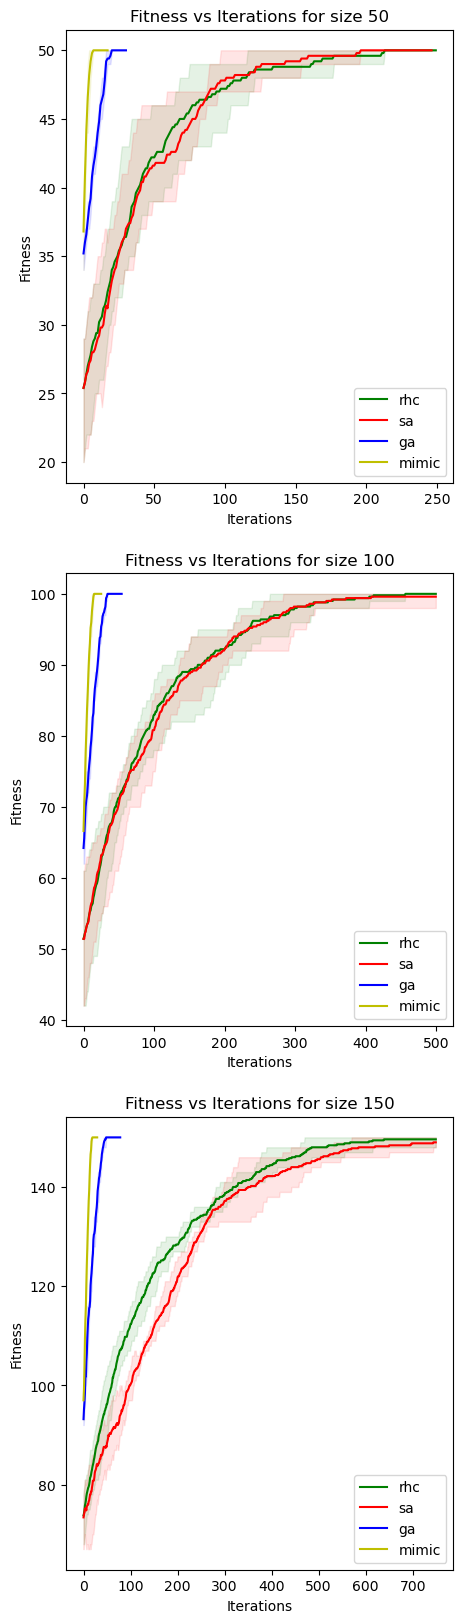

In [493]:
fig, ax = plt.subplots(3, 1, figsize=(5, 20))
for size,_ in zip([50,100,150],[0,1,2]):
    mean_fitness_rhc = []
    max_fitness_rhc = []
    min_fitness_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_rhc_min,l_rhc_max):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5-1][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
        
    mean_fitness_sa = []
    max_fitness_sa = []
    min_fitness_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0]
        

        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0] if i < length1 else fitness_curve_dic_sa[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0] if i < length2 else fitness_curve_dic_sa[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0] if i < length3 else fitness_curve_dic_sa[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0] if i < length4 else fitness_curve_dic_sa[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0] if i < length5 else fitness_curve_dic_sa[(size,375)][length5-1][0]
        
        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_ga = []
    max_fitness_ga = []
    min_fitness_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0]
        

        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
    
    for i in range(l_ga_min,l_ga_max):
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0] if i < length1 else fitness_curve_dic_ga[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0] if i < length2 else fitness_curve_dic_ga[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0] if i < length3 else fitness_curve_dic_ga[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0] if i < length4 else fitness_curve_dic_ga[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0] if i < length5 else fitness_curve_dic_ga[(size,375)][length5-1][0]
        
        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_mimic = []
    max_fitness_mimic = []
    min_fitness_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0]
        

        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5-1][0]
        
        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    ax[_].fill_between(range(l_rhc_max), min_fitness_rhc, max_fitness_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fitness_rhc,color='g',label='rhc')

    ax[_].fill_between(range(l_sa_max), min_fitness_sa, max_fitness_sa, alpha=0.1, color="r")
    ax[_].plot(mean_fitness_sa,color='r',label='sa')


    ax[_].fill_between(range(l_ga_max), min_fitness_ga, max_fitness_ga, alpha=0.1, color="b")
    ax[_].plot(mean_fitness_ga,color='b',label='ga')

    ax[_].fill_between(range(l_mimic_max), min_fitness_mimic, max_fitness_mimic, alpha=0.1, color="y")
    ax[_].plot(mean_fitness_mimic,color='y',label='mimic')

    ax[_].legend(loc='lower right')
    ax[_].set_xlabel('Iterations')
    ax[_].set_ylabel('Fitness')
    ax[_].set_title('Fitness vs Iterations for size {}'.format(size))
    

In [410]:
len(min_fitness_rhc)

97

In [409]:
l_rhc_max,l_rhc_min

(73, 45)

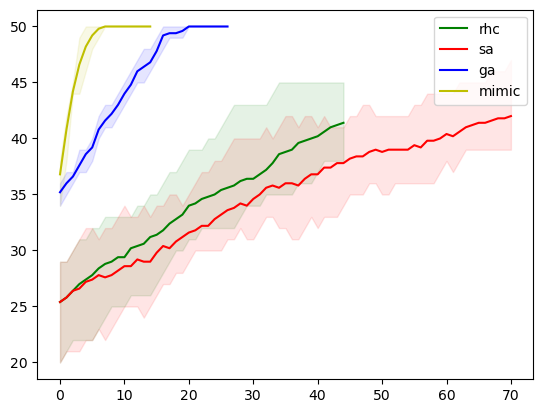

In [400]:
plt.fill_between(range(l_rhc), min_fitness_rhc, max_fitness_rhc, alpha=0.1, color="g",)
plt.plot(mean_fitness_rhc,color='g',label='rhc')

plt.fill_between(range(l_sa), min_fitness_sa, max_fitness_sa, alpha=0.1, color="r",)
plt.plot(mean_fitness_sa,color='r',label='sa')


plt.fill_between(range(l_ga), min_fitness_ga, max_fitness_ga, alpha=0.1, color="b",)
plt.plot(mean_fitness_ga,color='b',label='ga')

plt.fill_between(range(l_mimic), min_fitness_mimic, max_fitness_mimic, alpha=0.1, color="y",)
plt.plot(mean_fitness_mimic,color='y',label='mimic')
plt.legend(loc='best')





# plot fevals by iterations

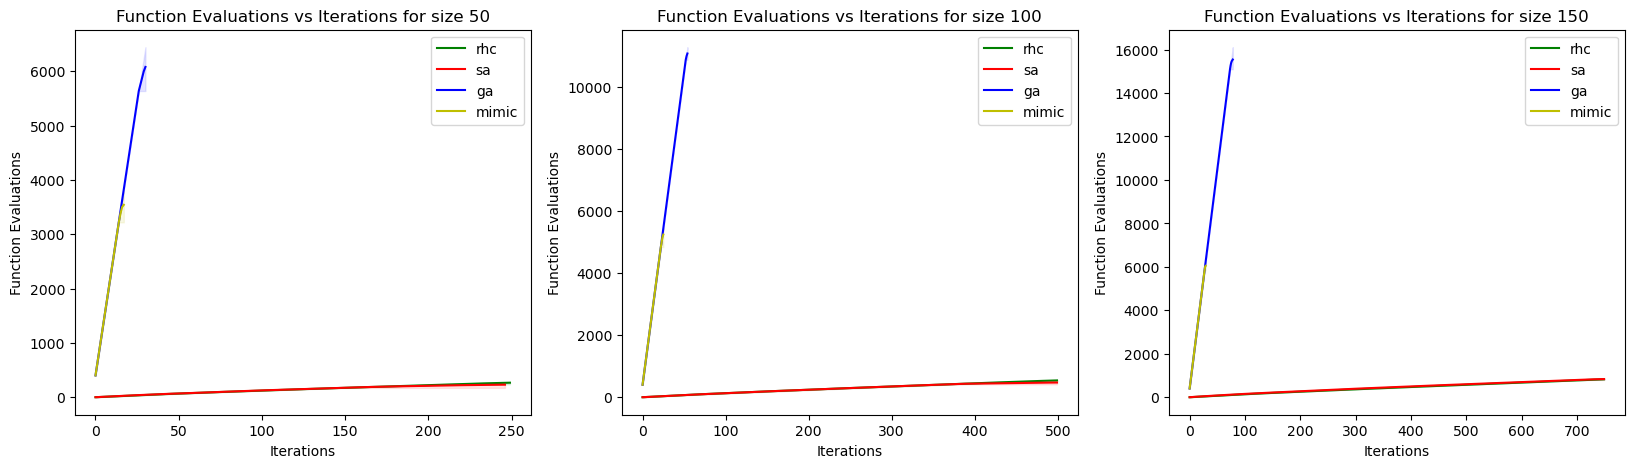

In [495]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for size,_ in zip([50,100,150],[0,1,2]):
    
    mean_fevals_rhc = []
    max_fevals_rhc = []
    min_fevals_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))

    for i in range(l_rhc_min,l_rhc_max):
        
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5 - 1][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fevals_sa = []
    max_fevals_sa = []
    min_fevals_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1]
        

        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1] if i < length1 else fitness_curve_dic_sa[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1] if i < length2 else fitness_curve_dic_sa[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1] if i < length3 else fitness_curve_dic_sa[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1] if i < length4 else fitness_curve_dic_sa[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1] if i < length5 else fitness_curve_dic_sa[(size,375)][length5 - 1][1]
        
        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))    
        
        
    mean_fevals_ga = []
    max_fevals_ga = []
    min_fevals_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1]
        

        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_ga_min,l_ga_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1] if i < length1 else fitness_curve_dic_ga[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1] if i < length2 else fitness_curve_dic_ga[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1] if i < length3 else fitness_curve_dic_ga[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1] if i < length4 else fitness_curve_dic_ga[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1] if i < length5 else fitness_curve_dic_ga[(size,375)][length5 - 1][1]
        
        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    mean_fevals_mimic = []
    max_fevals_mimic = []
    min_fevals_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1]
        

        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5 - 1][1]
        
        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    ax[_].fill_between(range(l_rhc_max), min_fevals_rhc, max_fevals_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fevals_rhc,color='g',label='rhc')
    
    ax[_].fill_between(range(l_sa_max), min_fevals_sa, max_fevals_sa, alpha=0.1, color="r",)
    ax[_].plot(mean_fevals_sa,color='r',label='sa')
    
    ax[_].fill_between(range(l_ga_max), min_fevals_ga, max_fevals_ga, alpha=0.1, color="b",)
    ax[_].plot(mean_fevals_ga,color='b',label='ga')
    
    ax[_].fill_between(range(l_mimic_max), min_fevals_mimic, max_fevals_mimic, alpha=0.1, color="y",)
    ax[_].plot(mean_fevals_mimic,color='y',label='mimic')
    
    ax[_].legend(loc='best')
    ax[_].set_xlabel('Iterations')
    ax[_].set_ylabel('Function Evaluations')
    ax[_].set_title('Function Evaluations vs Iterations for size {}'.format(size))
    #log scale y axis
    #ax[_].set_yscale('log')
    
plt.show()
        
    


In [497]:
max_fevals_rhc,l_rhc_max

([2.0,
  3.0,
  5.0,
  7.0,
  8.0,
  10.0,
  12.0,
  14.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  22.0,
  24.0,
  25.0,
  26.0,
  28.0,
  30.0,
  32.0,
  33.0,
  35.0,
  37.0,
  38.0,
  40.0,
  42.0,
  44.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  53.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  61.0,
  62.0,
  64.0,
  65.0,
  67.0,
  68.0,
  70.0,
  71.0,
  72.0,
  73.0,
  75.0,
  76.0,
  78.0,
  79.0,
  80.0,
  81.0,
  83.0,
  84.0,
  85.0,
  87.0,
  88.0,
  90.0,
  91.0,
  93.0,
  94.0,
  95.0,
  96.0,
  98.0,
  99.0,
  100.0,
  102.0,
  104.0,
  106.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  114.0,
  115.0,
  116.0,
  117.0,
  119.0,
  120.0,
  122.0,
  123.0,
  124.0,
  125.0,
  126.0,
  127.0,
  128.0,
  129.0,
  130.0,
  131.0,
  133.0,
  135.0,
  137.0,
  138.0,
  139.0,
  140.0,
  142.0,
  143.0,
  144.0,
  145.0,
  146.0,
  148.0,
  149.0,
  151.0,
  152.0,
  153.0,
  154.0,
  155.0,
  157.0,
  158.0,
  159.0,
  160.0,
  161.0,
  162.0,
  163.0,
  164.0,
  

In [471]:
for s in [50,100,150]:
    print('size : ',s,'\n')
    print('RHC mean time :',np.mean(time_list_rhc[s]))
    print('SA mean time :',np.mean(time_list_sa[s]))
    print('GA mean time :',np.mean(time_list_ga[s]))
    print('MIMIC mean time :',np.mean(time_list_mimic[s]))
    print('\n')

size :  50 

RHC mean time : 0.002293252944946289
SA mean time : 0.0024655818939208984
GA mean time : 0.10124034881591797
MIMIC mean time : 4.92024564743042


size :  100 

RHC mean time : 0.002484560012817383
SA mean time : 0.00426950454711914
GA mean time : 0.1785311222076416
MIMIC mean time : 38.150489473342894


size :  150 

RHC mean time : 0.003624105453491211
SA mean time : 0.006069612503051758
GA mean time : 0.26018438339233396
MIMIC mean time : 84.08934583663941




In [422]:
?__name__ 

Type:        str
String form: __main__
Length:      8
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.